# Capstone Final Project
## COVID-19 in Texas per County

### Table of contents
1. [Procesing our Data](#extraction)
2. [Foursquare Data](#foursquare)
3. [Exlporatory Data Analysis](#eda)
4. [Conclusions](#conclusion)
3. [Bibliograpghy](#bio)


### Imports

In [1]:
import pandas as pd
import numpy as np
import requests
import matplotlib as mpl
import os
import urllib.request
from bs4 import BeautifulSoup
from matplotlib import pyplot
import matplotlib.pyplot as plt
!pip install folium
import folium
import seaborn as sns
from scipy import stats
print('All items succesfully imported !')

     |████████████████████████████████| 102kB 9.0MB/s ta 0:00:011
All items succesfully imported !


# 1. Processing our Data <a name="extraction"></a>
## 1.1 Create our COVID-19 dataframe per county in Texas
#### Source : https://en.wikipedia.org/wiki/COVID-19_pandemic_in_Texas#cite_note-80

In [2]:

#  Call & clean the webpage table into pure html code
source = requests.get('https://en.wikipedia.org/wiki/COVID-19_pandemic_in_Texas#cite_note-80').text
soup = BeautifulSoup(source,'lxml')

#  find element table with class 'wikitable' from the html code
table = soup.find('table', class_ ='wikitable')

#  Name our new headers
columns = ['County','Cases','Deaths','Recoveries','Ref','Other']

#  Pandas read the table from html code
df = pd.read_html(str(table))[0]

#  Define our new columns
df.columns = columns

#  Drop the columns that won't be needed
df.drop(columns=['Ref','Other'],inplace=True)

#  Drop last 2 rows
df.drop(df.tail(2).index,inplace=True)

#  Set the 'County' column as our table index
df.set_index('County',inplace=True)

#  Convert the string content into a numeric value, replace the error with NaN & replace the NaN with 0
df['Cases'] = pd.to_numeric(df['Cases'],errors='coerce').fillna(0)
df['Deaths'] = pd.to_numeric(df['Deaths'],errors='coerce').fillna(0)
df['Recoveries'] = pd.to_numeric(df['Recoveries'],errors='coerce').fillna(0)

#  Convert the dtype to 'int64'
df['Cases'] = df['Cases'].astype('int64')
df['Deaths'] = df['Deaths'].astype('int64')
df['Recoveries'] = df['Recoveries'].astype('int64')

df.head(10)

,Cases,Deaths,Recoveries
County,,,
Anderson,41,0,15
Andrews,21,0,17
Angelina,100,0,19
Aransas,2,0,2
Archer,0,0,0
Armstrong,2,0,2
Atascosa,24,1,11
Austin,15,0,11
Bailey,3,0,0


## 1.2 Create our POPULATION dataframe per county in Texas
#### Source : https://www.texas-demographics.com/counties_by_population

In [3]:

#  Call a new table that contains the population per county in Texas

source2 = requests.get('https://www.texas-demographics.com/counties_by_population').text
soup2 = BeautifulSoup(source2,'lxml')

#  find element table with class 'ranklist' from the html code
table2 = soup2.find('table', class_ ='ranklist')

#  Name our new headers
columns2 = ['Rank','County','Population']

#  Pandas read the table from html code
df2 = pd.read_html(str(table2))[0]

#  Define our new columns
df2.columns = columns2

#  Drop last row
df2.drop(df2.tail(1).index,inplace=True)

#  Add new row with the tied data from the 'source2'
new_row = pd.DataFrame({'Rank':'254','County':'Llano County','Population':int(20640)},index=[254])
df2 = df2.append(new_row)

#  Sort values alphabetically to match our COVID df
df2.sort_values(by='County', inplace=True, ascending=True)

#  Convert to numeric value the column 'Population'
df2['Population'] = pd.to_numeric(df2['Population'],errors='coerce').fillna(0)

#  Drop 'Rank' column
df2.drop(columns=['Rank'],inplace=True)

df2['County'] = df2['County'].map(lambda x: x.rstrip('County').rstrip(' '))
df2.loc[df2['County'] == 'Lampasas County and Llano'] = df2['County'].replace({'Lampasas County and Llano':'Lampasas'},inplace=True)
#df2.set_index('County',inplace=True)


df2.head(10)


,County,Population
56,Anderson,57863.0
130,Andrews,17818.0
43,Angelina,87607.0
102,Aransas,24763.0
171,Archer,8789.0
235,Armstrong,1916.0
67,Atascosa,48828.0
94,Austin,29565.0
189,Bailey,7092.0
111,Bandera,21763.0


## 1.3 Create our LATITUDE & LONGITUDE dataframe per county in Texas
#### Source :  https://docs.gaslamp.media/download-zip-code-latitude-longitude-city-state-county-csv/

In [4]:
# The code was removed by Watson Studio for sharing.

,county,latitude,longitude
0,Anderson,31.794191,-95.661964
1,Andrews,32.370377,-102.523255
2,Angelina,31.285984,-94.577084
3,Aransas,28.058922,-97.093640
4,Archer,33.615708,-98.687302
5,Armstrong,35.049184,-101.409336
6,Atascosa,28.926371,-98.524247
7,Austin,29.849283,-96.313271
8,Bailey,33.898805,-102.797253
9,Bandera,29.729603,-99.191141


## 1.4 Joining our dataframes & creating some calculations

In [5]:

#  Joining COVID df with -> POPULATION df as df3
df3 = df.join(df2.set_index('County'), on='County')

#  Final DataFrame joint df3 with -> LATITUDE & LONGITUDE df as df_final
df_final = df3.join(lat_lon.set_index('county'), on='County')

#  Convert into 'int64' the 'Population' column
df_final['Population'] = df_final['Population'].astype('int64')

''' # Identify the errors
error=df3.isnull()
rows=error.any(axis=1)
have=df3[rows]
have.head()
'''

#  Create the relations between COVID CASES & the 'Population' of each 'County' in Texas
df_final['Infected (%)'] = df_final['Cases']/df_final['Population']*100
df_final['Infected (%)'] = df_final['Infected (%)'].apply('{:.2f}%'.format)

df_final['Death Rate (%)'] = df_final['Deaths']/df_final['Cases']*100
df_final['Death Rate (%)'] = df_final['Death Rate (%)'].apply('{:.2f}%'.format)

df_final['Recovery Rate (%)'] = df_final['Recoveries']/df_final['Cases']*100
df_final['Recovery Rate (%)'] = df_final['Recovery Rate (%)'].apply('{:.2f}%'.format)

#  Drop the rows with zero cases of COVID CASES
df_final.drop(df_final[df_final['Cases']==0].index, axis=0, inplace=True)

#  Sort values with the most significant percentages
df_final.sort_values(by='Cases', inplace=True, ascending=False)


# Top-10 most infected counties in Texas by number of cases of COVID-19
top_10 = df_final.head(10)

top_10

,Cases,Deaths,Recoveries,Population,latitude,longitude,Infected (%),Death Rate (%),Recovery Rate (%)
County,,,,,,,,,
Harris,8176,179,3016,4602523,29.833990,-95.434241,0.18%,2.19%,36.89%
Dallas,6123,145,2511,2586552,32.767268,-96.777626,0.24%,2.37%,41.01%
Tarrant,3745,104,780,2019977,32.771419,-97.291484,0.19%,2.78%,20.83%
Travis,2171,65,713,1203166,30.326374,-97.771258,0.18%,2.99%,32.84%
Bexar,1920,57,976,1925865,29.437532,-98.461582,0.10%,2.97%,50.83%
Fort Bend,1404,40,236,739342,29.525461,-95.771651,0.19%,2.85%,16.81%
El Paso,1348,33,685,837654,31.694842,-106.299987,0.16%,2.45%,50.82%
Potter,1179,17,158,120899,35.401475,-101.895089,0.98%,1.44%,13.40%
Denton,946,25,440,807047,33.195872,-97.116282,0.12%,2.64%,46.51%


# 2. Foursquare Data : Number of CINEMAS in the Top-10 most infected counties in Texas <a name="foursquare"></a>
## 2.1 Get our API calls of 'Cinemas'

In [6]:
from pandas.io.json import json_normalize

#  My Foursquare Credentials
CLIENT_ID = 'IV1MMCOWYNPFZS5JDG3SY14JRW55SX45QN1ZDA3DQYPL2OEB'
CLIENT_SECRET = 'O2UPO5JMK0RF4Z0CST1NKI5CIXYG5HFS50OBOI2KHXCSIZHT'
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

#  Latitude & Longitude (1. Harris, TX | 2. Dallas, TX | 3. Tarrant, TX | 4. Travis, TX | 5. Bexar, TX | 6. Fort Bend, TX | 7. El Paso, TX | 8. Potter, TX | 9. Denton, TX | 10. Collin, TX)
lat1 = 29.833990
lon1 = -95.434241

lat2 = 32.767268
lon2 = -96.777626

lat3 = 32.771419
lon3 = -97.291484

lat4 = 30.326374
lon4 = -97.771258

lat5 = 29.437532
lon5 = -98.461582

lat6 = 29.525461
lon6 = -95.771651

lat7 = 31.694842
lon7 = -106.299987

lat8 = 35.401475
lon8 = -101.895089

lat9 = 33.195872
lon9 = -97.116282

lat10 = 33.152417
lon10 = -96.621427

#  Searching for Cinemas arround Texas Top-10 most infected counties in Foursquare within 6 miles the centre of each
search_query = 'Cinema'
radius = 10000

#  Define our url with the search query
url1 = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, lat1, lon1, VERSION, search_query, radius, LIMIT)
url1

url2 = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, lat2, lon2, VERSION, search_query, radius, LIMIT)
url2

url3 = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, lat3, lon3, VERSION, search_query, radius, LIMIT)
url3

url4 = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, lat4, lon4, VERSION, search_query, radius, LIMIT)
url4

url5 = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, lat5, lon5, VERSION, search_query, radius, LIMIT)
url5

url6 = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, lat6, lon6, VERSION, search_query, radius, LIMIT)
url6

url7 = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, lat7, lon7, VERSION, search_query, radius, LIMIT)
url7

url8 = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, lat8, lon8, VERSION, search_query, radius, LIMIT)
url8

url9 = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, lat9, lon9, VERSION, search_query, radius, LIMIT)
url9

url10 = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, lat10, lon10, VERSION, search_query, radius, LIMIT)
url10



Your credentails:
CLIENT_ID: IV1MMCOWYNPFZS5JDG3SY14JRW55SX45QN1ZDA3DQYPL2OEB
CLIENT_SECRET:O2UPO5JMK0RF4Z0CST1NKI5CIXYG5HFS50OBOI2KHXCSIZHT


'https://api.foursquare.com/v2/venues/search?client_id=IV1MMCOWYNPFZS5JDG3SY14JRW55SX45QN1ZDA3DQYPL2OEB&client_secret=O2UPO5JMK0RF4Z0CST1NKI5CIXYG5HFS50OBOI2KHXCSIZHT&ll=33.152417,-96.621427&v=20180604&query=Cinema&radius=10000&limit=30'

## 2.2 Clean and process our results

In [7]:
#  Let's see the results
results = requests.get(url1).json()

# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
df_1 = json_normalize(venues)

# clean column names by keeping only last term
df_1.columns = [column.split('.')[-1] for column in df_1.columns]

columns = ['city','name']
df_1 = df_1.loc[:, columns]

row1 = df_1.groupby(['city']).agg(['count'],as_index=True)

row1 = row1.reset_index()

row1 = row1.replace('Houston','Harris')

headers = ['County','Cinemas']

row1.columns = headers
row1

 #Harris, TX

,County,Cinemas
0,Harris,9


In [8]:
#  Let's see the results
results = requests.get(url2).json()

# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
df_2 = json_normalize(venues)

# clean column names by keeping only last term
df_2.columns = [column.split('.')[-1] for column in df_2.columns]

columns = ['city','name']
df_2 = df_2.loc[:, columns]

row2 = df_2.groupby(['city']).agg(['count'],as_index=True)

row2 = row2.reset_index()

headers = ['County','Cinemas']

row2.columns = headers

row2 #OK

,County,Cinemas
0,Dallas,5


In [9]:
#  Let's see the results
results = requests.get(url3).json()

# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
df_3 = json_normalize(venues)

# clean column names by keeping only last term
df_3.columns = [column.split('.')[-1] for column in df_3.columns]

columns = ['city','name']
df_3 = df_3.loc[:, columns]

row3 = df_3.groupby(['city']).agg(['count'],as_index=True)

row3 = row3.reset_index()

row3 = row3.replace({'Brownsville':'Tarrant','Fort Worth':'Tarrant','Hurst':'Tarrant'})

row3 = row3.groupby(['city']).agg(['sum'])

row3 = row3.reset_index()

headers = ['County','Cinemas']

row3.columns = headers

row3 # Tarrant, TX

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/generic.py:3812: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_axis = axis.drop(labels, errors=errors)


,County,Cinemas
0,Tarrant,7


In [10]:
#  Let's see the results
results = requests.get(url4).json()

# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
df_4 = json_normalize(venues)

# clean column names by keeping only last term
df_4.columns = [column.split('.')[-1] for column in df_4.columns]

columns = ['city','name']
df_4 = df_4.loc[:, columns]

row4 = df_4.groupby(['city']).agg(['count'],as_index=True)

row4 = row4.reset_index()

row4 = row4.replace({'Austin':'Travis'})

headers = ['County','Cinemas']

row4.columns = headers

row4 # Travis, TX

,County,Cinemas
0,Travis,17


In [11]:
#  Let's see the results
results = requests.get(url5).json()

# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
df_5 = json_normalize(venues)

# clean column names by keeping only last term
df_5.columns = [column.split('.')[-1] for column in df_5.columns]

columns = ['city','name']
df_5 = df_5.loc[:, columns]

row5 = df_5.groupby(['city']).agg(['count'],as_index=True)

row5 = row5.reset_index()

row5 = row5.replace({'Broken Arrow':'Bexar','San Antonio':'Bexar'})

row5 = row5.groupby(['city']).agg(['sum'])

row5 = row5.reset_index()

headers = ['County','Cinemas']

row5.columns = headers

row5 # Bexar, TX

,County,Cinemas
0,Bexar,13


In [12]:
#  Let's see the results
results = requests.get(url6).json()

# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
df_6 = json_normalize(venues)

# clean column names by keeping only last term
df_6.columns = [column.split('.')[-1] for column in df_6.columns]

columns = ['city','name']
df_6 = df_6.loc[:, columns]

row6 = df_6.groupby(['city']).agg(['count'],as_index=True)

row6 = row6.reset_index()

row6 = row6.replace({'Rosenberg':'Fort Bend'})

headers = ['County','Cinemas']

row6.columns = headers

row6 # Fort Bend, TX

,County,Cinemas
0,Fort Bend,2


In [13]:
#  Let's see the results
results = requests.get(url7).json()

# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
df_7 = json_normalize(venues)

# clean column names by keeping only last term
df_7.columns = [column.split('.')[-1] for column in df_7.columns]

columns = ['city','name']
df_7 = df_7.loc[:, columns]

row7 = df_7.groupby(['city']).agg(['count'],as_index=True)

row7 = row7.reset_index()

row7 = row7.replace({'Albuquerque':'El Paso','Lewisville':'El Paso'})

row7 = row7.groupby(['city']).agg(['sum'])

row7 = row7.reset_index()

headers = ['County','Cinemas']

row7.columns = headers

row7 # El Paso, TX

,County,Cinemas
0,El Paso,8


In [14]:
data_8 = {'city':['Potter'],'name':[0]}

row8 = pd.DataFrame(data_8)

headers = ['County','Cinemas']

row8.columns = headers

row8 #OK

,County,Cinemas
0,Potter,0


In [15]:
#  Let's see the results
results = requests.get(url9).json()

# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
df_9 = json_normalize(venues)

# clean column names by keeping only last term
df_9.columns = [column.split('.')[-1] for column in df_9.columns]

columns = ['city','name']
df_9 = df_9.loc[:, columns]

row9 = df_9.groupby(['city']).agg(['count'],as_index=True)

row9 = row9.reset_index()

headers = ['County','Cinemas']

row9.columns = headers

row9 # OK

,County,Cinemas
0,Denton,6


In [16]:
#  Let's see the results
results = requests.get(url10).json()

# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
df_10 = json_normalize(venues)

# clean column names by keeping only last term
df_10.columns = [column.split('.')[-1] for column in df_10.columns]

columns = ['city','name']
df_10 = df_10.loc[:, columns]

row10 = df_10.groupby(['city']).agg(['count'],as_index=True)

row10 = row10.reset_index()

row10 = row10.replace({'Allen':'Collin','McKinney':'Collin','Plano':'Collin'})

row10 = row10.groupby(['city']).agg(['sum'])

row10 = row10.reset_index()

headers = ['County','Cinemas']

row10.columns = headers

row10  # Collin, TX

,County,Cinemas
0,Collin,12


## 2.3 Joining our rows to create the CINEMA dataframe of the Top-10 most infected counties in Texas 

In [17]:
# Creating our new CINEMA dafatframe
df_cine = row1.append(row2)

df_cine = df_cine.append(row3)

df_cine = df_cine.append(row4)

df_cine = df_cine.append(row5)

df_cine = df_cine.append(row6)

df_cine = df_cine.append(row7)

df_cine = df_cine.append(row8)

df_cine = df_cine.append(row9)

df_cine = df_cine.append(row10, ignore_index=True)

df_cine


,County,Cinemas
0,Harris,9
1,Dallas,5
2,Tarrant,7
3,Travis,17
4,Bexar,13
5,Fort Bend,2
6,El Paso,8
7,Potter,0
8,Denton,6
9,Collin,12


## 2.4 FINAL DATAFRAME

In [18]:
#  Final DataFrame joint top_10 with -> CINEMA df as TOP10
TOP10 = top_10.join(df_cine.set_index('County'), on='County')
TOP10 = TOP10.reset_index()
TOP10

,County,Cases,Deaths,Recoveries,Population,latitude,longitude,Infected (%),Death Rate (%),Recovery Rate (%),Cinemas
0,Harris,8176,179,3016,4602523,29.833990,-95.434241,0.18%,2.19%,36.89%,9
1,Dallas,6123,145,2511,2586552,32.767268,-96.777626,0.24%,2.37%,41.01%,5
2,Tarrant,3745,104,780,2019977,32.771419,-97.291484,0.19%,2.78%,20.83%,7
3,Travis,2171,65,713,1203166,30.326374,-97.771258,0.18%,2.99%,32.84%,17
4,Bexar,1920,57,976,1925865,29.437532,-98.461582,0.10%,2.97%,50.83%,13
5,Fort Bend,1404,40,236,739342,29.525461,-95.771651,0.19%,2.85%,16.81%,2
6,El Paso,1348,33,685,837654,31.694842,-106.299987,0.16%,2.45%,50.82%,8
7,Potter,1179,17,158,120899,35.401475,-101.895089,0.98%,1.44%,13.40%,0
8,Denton,946,25,440,807047,33.195872,-97.116282,0.12%,2.64%,46.51%,6
9,Collin,939,29,587,944350,33.152417,-96.621427,0.10%,3.09%,62.51%,12


## Let's see how it look in the map

In [19]:
#  Texas State Lat & Long
latitude = 31.000000
longitude = -100.000000

# create map of Texas using latitude and longitude values
map_texas = folium.Map(location=[latitude, longitude], zoom_start=6)

# add markers to map
for lat, lng, county in zip(TOP10['latitude'], TOP10['longitude'], TOP10['County']):
    label = '{}'.format(county)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_texas)  
    
map_texas

# 3. Exploratory Data Analysis <a name="eda"></a>
## 3.1 Our data into graphs

### Bar Charts


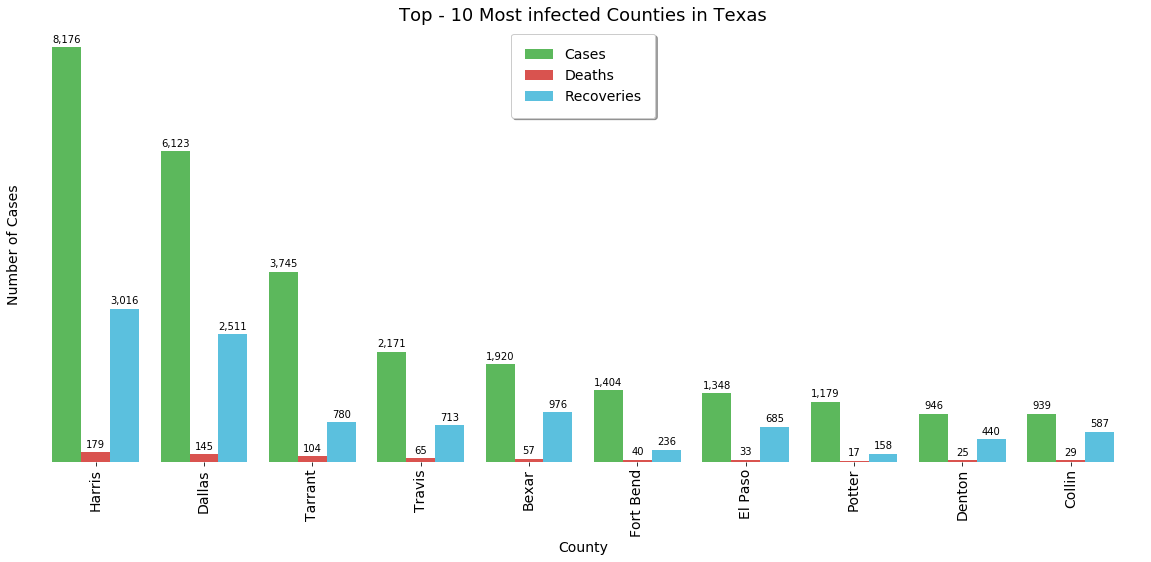

In [20]:
#  Prepare our dataframe for the bar chart
TOP10
cols = ['Population','latitude','longitude','Infected (%)','Death Rate (%)','Recovery Rate (%)','Cinemas']
bar10 = TOP10.drop(columns= cols)
bar10.set_index('County',inplace=True)
bar10
    
#  Bar Chart for each County number of COVID cases

colors_list = ['#5cb85c','#d9534f','#5bc0de']


ax = bar10.plot(kind='bar',figsize=(20,8),width = 0.8,color = colors_list,edgecolor=None)
plt.legend(labels=bar10.columns,fontsize= 14,fancybox=True, framealpha=1, shadow=True, borderpad=1,loc ='upper center')
plt.title("Top - 10 Most infected Counties in Texas",fontsize= 18)
plt.ylabel('Number of Cases',fontsize = 14)
plt.xlabel('County',fontsize = 14)

plt.xticks(fontsize=14)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.yticks([])

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:,}'.format(height), (p.get_x()+.5*width, p.get_y() + height + 100), ha = 'center')


### Top - 10 Infection Rate (%) in Texas

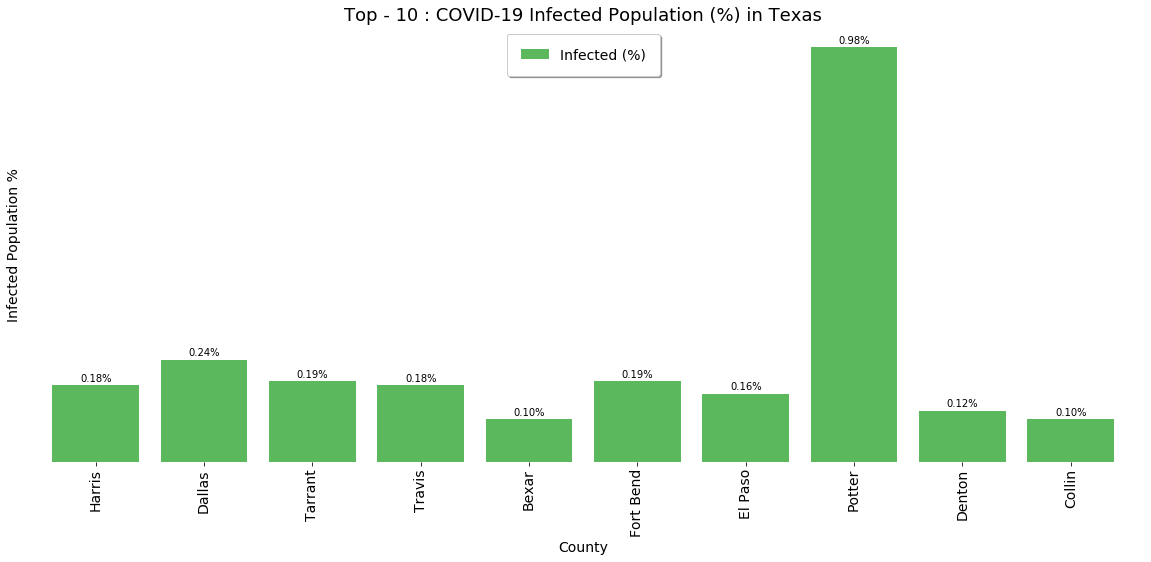

In [21]:
#  Prepare our dataframe for the bar chart

cols = ['Population','latitude','longitude','Cases','Deaths','Recoveries','Cinemas', 'Death Rate (%)','Recovery Rate (%)']
rates_i = TOP10.drop(columns= cols)
rates_i.set_index('County',inplace=True)

rates_i['Infected (%)'] = rates_i['Infected (%)'].apply('{:.4}'.format)
rates_i['Infected (%)'] = rates_i['Infected (%)'].astype('float64')

rates_i
    
#  Bar Chart for each County number of COVID cases

colors_list = ['#5cb85c']


ax = rates_i.plot(kind='bar',figsize=(20,8),width = 0.8,color = colors_list,edgecolor=None)
plt.legend(labels=rates_i.columns,fontsize= 14,fancybox=True, framealpha=1, shadow=True, borderpad=1,loc ='upper center')
plt.title("Top - 10 : COVID-19 Infected Population (%) in Texas",fontsize= 18)
plt.ylabel('Infected Population %',fontsize = 14)
plt.xlabel('County',fontsize = 14)

plt.xticks(fontsize=14)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.yticks([])

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.2f}%'.format(height), (p.get_x()+.5*width, p.get_y() + height + 0.01), ha = 'center')

### Top - 10 : COVID-19 Death Rate (%) in Texas

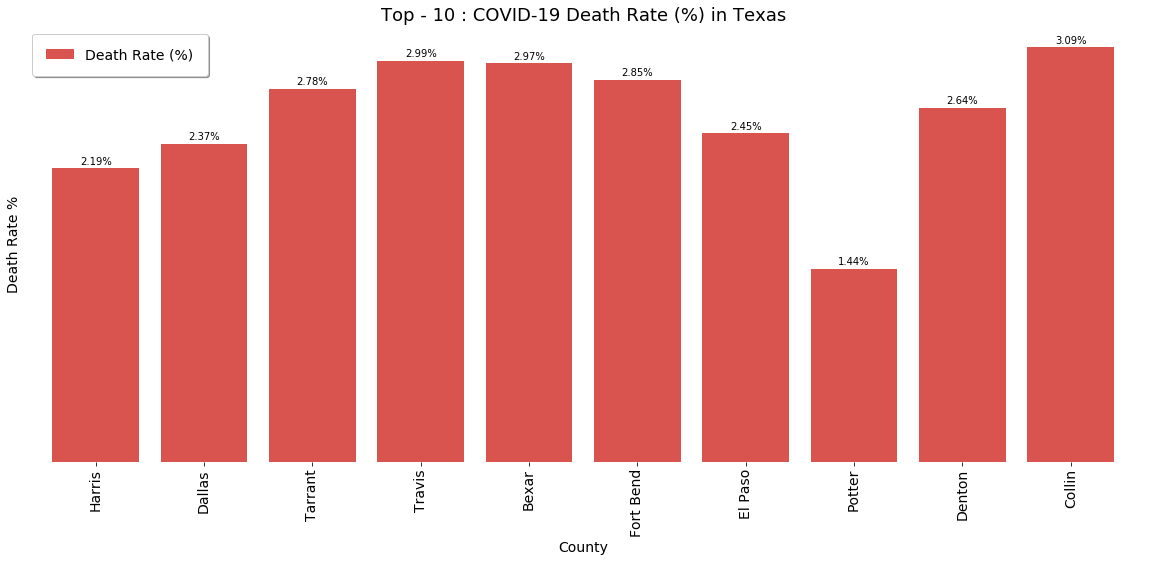

In [22]:
#  Prepare our dataframe for the bar chart

cols = ['Population','latitude','longitude','Cases','Deaths','Recoveries','Cinemas','Infected (%)','Recovery Rate (%)']
rates_d = TOP10.drop(columns= cols)
rates_d.set_index('County',inplace=True)

rates_d['Death Rate (%)'] = rates_d['Death Rate (%)'].apply('{:.4}'.format)

rates_d['Death Rate (%)'] = rates_d['Death Rate (%)'].astype('float64')

#rates_d = rates_D.sort_values('Death Rate (%)', ascending= True)

rates_d

#  Bar Chart for each County number of COVID cases

colors_list = ['#d9534f']


ax = rates_d.plot(kind='bar',figsize=(20,8),width = 0.8,color = colors_list,edgecolor=None)
plt.legend(labels=rates_d.columns,fontsize= 14,fancybox=True, framealpha=1, shadow=True, borderpad=1,loc ='upper left')
plt.title("Top - 10 : COVID-19 Death Rate (%) in Texas",fontsize= 18)
plt.ylabel('Death Rate %',fontsize = 14)
plt.xlabel('County',fontsize = 14)

plt.xticks(fontsize=14)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.yticks([])

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.2f}%'.format(height), (p.get_x()+.5*width, p.get_y() + height + 0.03), ha = 'center')

### Top - 10 : COVID-19 Recovery Rate (%) in Texas

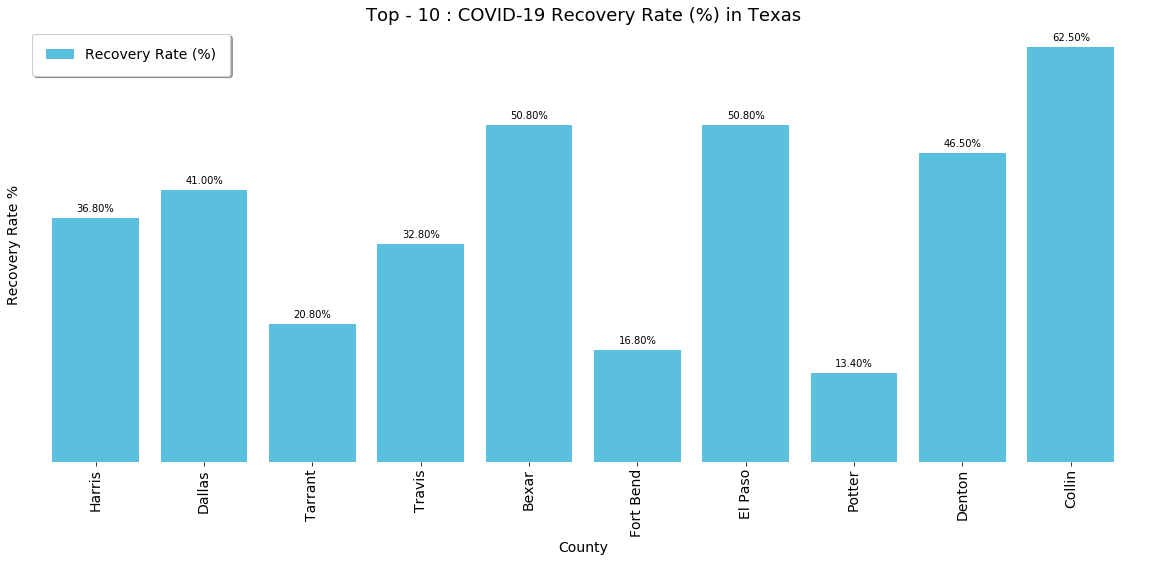

In [23]:
#  Prepare our dataframe for the bar chart

cols = ['Population','latitude','longitude','Cases','Deaths','Recoveries','Cinemas','Infected (%)','Death Rate (%)']
rates_r = TOP10.drop(columns= cols)
rates_r.set_index('County',inplace=True)

rates_r['Recovery Rate (%)'] = rates_r['Recovery Rate (%)'].apply('{:.4}'.format)

rates_r['Recovery Rate (%)'] = rates_r['Recovery Rate (%)'].astype('float64')

#rates_r = rates.sort_values('Recovery Rate (%)', ascending= True)

rates_r

#  Bar Chart for each County number of COVID cases

colors_list = ['#5bc0de']


ax = rates_r.plot(kind='bar',figsize=(20,8),width = 0.8,color = colors_list,edgecolor=None)
plt.legend(labels=rates_r.columns,fontsize= 14,fancybox=True, framealpha=1, shadow=True, borderpad=1,loc ='upper left')
plt.title("Top - 10 : COVID-19 Recovery Rate (%) in Texas",fontsize= 18)
plt.ylabel('Recovery Rate %',fontsize = 14)
plt.xlabel('County',fontsize = 14)

plt.xticks(fontsize=14)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.yticks([])

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.2f}%'.format(height), (p.get_x()+.5*width, p.get_y() + height + 1), ha = 'center')

## 3.2 Correlation: Let's see if 'Cinemas' it's a potencial cause of the spread of COVID-19

In [24]:
#  First we'll need to know the types of our data

print(TOP10.dtypes) # Final Dataframe
print()
print(bar10.dtypes) # Data for the Number of Cases
print()
print(rates_i.dtypes) # Data for the Infected Rate
print()
print(rates_d.dtypes) # Data for the Death Rate
print()
print(rates_r.dtypes) # Data for the Recovery Rate

County                object
Cases                  int64
Deaths                 int64
Recoveries             int64
Population             int64
latitude             float64
longitude            float64
Infected (%)          object
Death Rate (%)        object
Recovery Rate (%)     object
Cinemas                int64
dtype: object

Cases         int64
Deaths        int64
Recoveries    int64
dtype: object

Infected (%)    float64
dtype: object

Death Rate (%)    float64
dtype: object

Recovery Rate (%)    float64
dtype: object


In [25]:
#  Then, let's try to see the correlation between: Number of Cases & Cinemas

TOP10[['Cases', 'Deaths', 'Recoveries', 'Cinemas']].corr()  


,Cases,Deaths,Recoveries,Cinemas
Cases,1.000000,0.986803,0.953550,0.017463
Deaths,0.986803,1.000000,0.933910,0.105287
Recoveries,0.953550,0.933910,1.000000,0.130338
Cinemas,0.017463,0.105287,0.130338,1.000000


## 3.3 Cinemas vs. Cases of COVID-19

(0, 59.48116776772335)

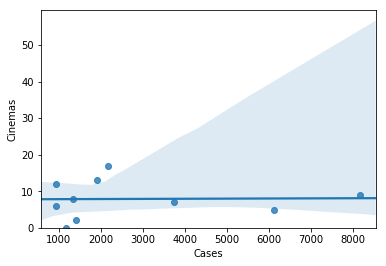

In [26]:
# Number of Cinemas in the County as a potencial cause of infection

sns.regplot(x="Cases", y="Cinemas", data=TOP10)
plt.ylim(0,)

In [27]:
#  Let's confirm how correlated the Number of Cinemas & Cases are

TOP10[['Cases', 'Cinemas']].corr() 



,Cases,Cinemas
Cases,1.000000,0.017463
Cinemas,0.017463,1.000000


 We can examine the correlation between 'Cinemas' and 'Cases' and see it's approximately  0.017 : *IT'S POSSITIVE CORRELATED, BUT IT'S VERY LOW !*

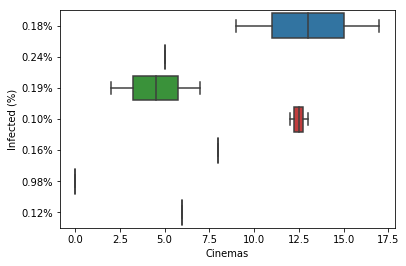

In [41]:
sns.boxplot(y="Infected (%)", x="Cinemas", data=TOP10)


## 4. Conlcusions <a name="conclusion"></a>
### 4.1 Cinemas vs Cases

We see that the distributions of *'INFECTED (%)'* between the 'CINEMAS' doesn't have a significant overlap, and so *'CINEMAS'* could be *ONE OF MANY* probable causes of the virus spread.

<b>P-value</b>: 
<p>What is this P-value? The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.</p>

By convention, when the
<ul>
    <li>p-value is $<$ 0.001: we say there is strong evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.05: there is moderate evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.1: there is weak evidence that the correlation is significant.</li>
    <li>the p-value is $>$ 0.1: there is no evidence that the correlation is significant.</li>
</ul>

In [29]:
pearson_coef, p_value = stats.pearsonr(TOP10['Cinemas'], TOP10['Cases'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.017463487837363907  with a P-value of P = 0.961810268628997


#### Conclusion: <p>Since the p-value isn't $<$ 0.001, the correlation between Cinemas and Cases isn't statistically significant, and the linear relationship is quite weak (~0.0174, close to 0)</p>

### 4.1 Cinemas vs Infected Rate (%)

In [30]:
pearson_coef, p_value = stats.pearsonr(rates_i['Infected (%)'], TOP10['Cinemas'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is -0.5931096086646064  with a P-value of P = 0.07071616053641348


#### Conclusion: <p>Since the p-value isn't $<$ 0.001, the correlation between Cinemas and Cases isn't statistically significant, and the linear relationship is negative and quite weak (~-0.593)</p>

## 5. Bibliography <a name="bio"></a>

###  COVID-19 Cases per county in Texas : https://en.wikipedia.org/wiki/COVID-19_pandemic_in_Texas#Statistics
###  Population per county in Texas : https://www.texas-demographics.com/counties_by_population
###  Latitude and longitude per county in Texas file : https://docs.gaslamp.media/download-zip-code-latitude-longitude-city-state-county-csv/

In [31]:
df_final['Population'].sum()

27769133